### Biocode AI: Patient 3 Case Study
09.26.2023</br>

Team members: 
- Drew Gutschmidt, *Founder*
- Patrick Audley, *CTO*
- Alisher Ganiev, *Back-End Web Developer*
- Cyrus Mirhosseini, *UI/UX Designer*
- Jeff Powell, *Front-End Web Developer*
- Fallyn Thompson, *Data Scientist*

#### Notebook Housekeeping: 
- [Libraries and API Set-Up](#housekeeping)
- [API Connection](#api)
- [Libraries](#libraries)
- [SequentialChain Imports + Set-up](#seq0)

#### Import Case Study: 
- [Case Study Import](#import_cs_pickle)
- [Lab Work Import](#import_lw_pickle)

#### Case Study #3 Demo: 
- [Case Study #3 Demo: Intake -> Treatment Plan Sources](#seq1)

---

####  Libraries and API Set-Up: <a class="anchor" id="housekeeping"></a>

#### API Connection <a class="anchor" id="api"></a>

In [1]:
import os
import openai
from sk import my_sk #import API key from file
import time

In [2]:
openai.api_key = my_sk

####  Libraries <a class="anchor" id="libraries"></a>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from pandas import option_context

In [4]:
import transformers
import torch

#### SequentialChain Imports + Set-up <a class="anchor" id="seq0"></a>

In [5]:
from langchain.llms import OpenAI
from langchain.chat_models import ChatOpenAI
from langchain.chains import LLMChain, SequentialChain, SimpleSequentialChain
from langchain.prompts import PromptTemplate
from langchain.memory import SimpleMemory

In [6]:
llm = ChatOpenAI(model_name='gpt-4', temperature=1, openai_api_key=my_sk)

---

#### Case Study Import <a class="anchor" id="import_cs_pickle"></a>

In [7]:
with open('cs_df_setup_p2.pkl', 'rb') as file:
    df2_cs, cs_column_groups = pickle.load(file)

In [8]:
df2_cs.head(1)

,Type,Case #,Case Title,Patient_ID,Species,Breed,Weight,Sex,Age,History,Symptoms Free-Text,Symptoms,Physical Examination,Differential Diagnoses,Medical Tests,Lab Interpretation,Absolute Diagnosis,Plan of Treatment
2,Cat Case Studies,3,Cat with weight loss and a distended abdomen,Patient_3,Cat,American domestic shorthair,3.9 kg,Male,2yrs,Medical history: 6-week history of recurring l...,A 2-year-old male neutered American domestic s...,General: Thin and appears ill\nSkin: Slightly ...,"General appearance: Thin, lethargic, distended...",Abdominal muscle hypotonia\nFluid\nGas\nGastro...,Blood chemistry profile (BCP)\nComplete blood ...,Lymph node cytology shows a reactive lymph nod...,Feline infectious peritonitis (FIP),Provide fluids to maintain hydration status\nP...


In [9]:
with option_context('display.max_colwidth', 500):
    display(df2_cs)

,Type,Case #,Case Title,Patient_ID,Species,Breed,Weight,Sex,Age,History,Symptoms Free-Text,Symptoms,Physical Examination,Differential Diagnoses,Medical Tests,Lab Interpretation,Absolute Diagnosis,Plan of Treatment
2,Cat Case Studies,3,Cat with weight loss and a distended abdomen,Patient_3,Cat,American domestic shorthair,3.9 kg,Male,2yrs,Medical history: 6-week history of recurring lethargy and anorexia\nSurgical history: Neutered at a young age\nMedications: NSAID and antibiotic 4 weeks prior; vaccinations current\nAllergies: No known allergies\nFamily history: Not known\nSocial history: Lives in household with another cat that is new to the household,A 2-year-old male neutered American domestic shorthair cat is brought to the clinic by his owner for further evaluation. The cat has been lethargic and anorectic on and off for approximately 6 weeks. Treatment with an oral NSAID and antibiotic resulted in improvement until 2 weeks ago. The owner tells you that now the cat's appetite has decreased and there is visible weight loss with a distended abdomen. The referring DVM's lab work from the initial visit 6 weeks ago showed increased serum g...,General: Thin and appears ill\nSkin: Slightly yellow skin color\nHEENT: Noncontributory\nPulmonary: Noncontributory\nCardiovascular: Noncontributory\nGastrointestinal: Noncontributory\nGenitourinary: Noncontributory\nMusculoskeletal: Noncontributory\nNeurologic: Quiet but alert,"General appearance: Thin, lethargic, distended abdomen\nTemperature: 36.4°C (97.6°F)\nPulse: 190 beats/min\nRespirations: 90/min\nWeight: 3.9 kg (8.6 lb)\nSkin: Hair coat normal\nHEENT: Mucus membranes pale and slightly yellow, moist\nPulmonary: Eupneic with no abnormal lung sounds\nCardiovascular: Capillary refill time prolonged, no arrhythmias or pulse deficits\nGastrointestinal: Gut sounds absent, abdomen distended with fluid wave\nGenitourinary: Urination not observed, small bladder palp...",Abdominal muscle hypotonia\nFluid\nGas\nGastrointestinal contents\nSoft tissue\nFeline infectious peritonitis (FIP)\nLymphoma,Blood chemistry profile (BCP)\nComplete blood count (CBC)\nUrinalysis\nTest for feline leukemia virus (FELV) and feline immunodeficiency virus (FIV)\nAbdominocentesis with cytologic evaluation of fluid\nAbdominal lymph node aspirate with follow-up cytology\nComplete ocular examination\nImmunostaining of peritoneal effusion for FCoV antigens\n\n\n\n,Lymph node cytology shows a reactive lymph node and immunostaining is positive.,Feline infectious peritonitis (FIP),Provide fluids to maintain hydration status\nProvide nutritional support\nRemove excess fluid from the abdomen


In [10]:
#Sanity check to confirm dictionary groups created correctly
df2_cs[cs_column_groups['Patient_Info']]

,Patient_ID,Species,Breed,Weight,Sex,Age,History
2,Patient_3,Cat,American domestic shorthair,3.9 kg,Male,2yrs,Medical history: 6-week history of recurring l...


---

#### Lab Work Import <a class="anchor" id="import_lw_pickle"></a>

In [11]:
with open('lw_df_setup_p2.pkl', 'rb') as file:
    df2_lw, lw_column_groups = pickle.load(file)

In [12]:
df2_lw.head(1)

,Patient_ID,Blood Chemistry Profile (BCP)_0 Lower Range,Blood Chemistry Profile (BCP)_1 Upper Range,Blood Chemistry Profile (BCP)_Test,Blood Chemistry Profile ALP (IU/L)_0 Lower Range,Blood Chemistry Profile ALP (IU/L)_1 Upper Range,Blood Chemistry Profile ALP (IU/L)_Test,Blood Chemistry Profile ALT (IU/L)_0 Lower Range,Blood Chemistry Profile ALT (IU/L)_1 Upper Range,Blood Chemistry Profile ALT (IU/L)_Test,...,Synovial fluid analysis Total protein_0 Lower Range,Synovial fluid analysis Total protein_1 Upper Range,Synovial fluid analysis Total protein_Test,Synovial fluid analysis Turbidity_Range,Synovial fluid analysis Turbidity_Test,Synovial fluid analysis Viscosity_0 Lower Range,Synovial fluid analysis Viscosity_1 Upper Range,Synovial fluid analysis Viscosity_Test,Synovial fluid analysis_Range,Synovial fluid analysis_Test
2,Patient_3,NaN,,NaN,NaN,NaN,NaN,20,108,21.0,...,NaN,,NaN,NaN,NaN,NaN,,NaN,NaN,NaN


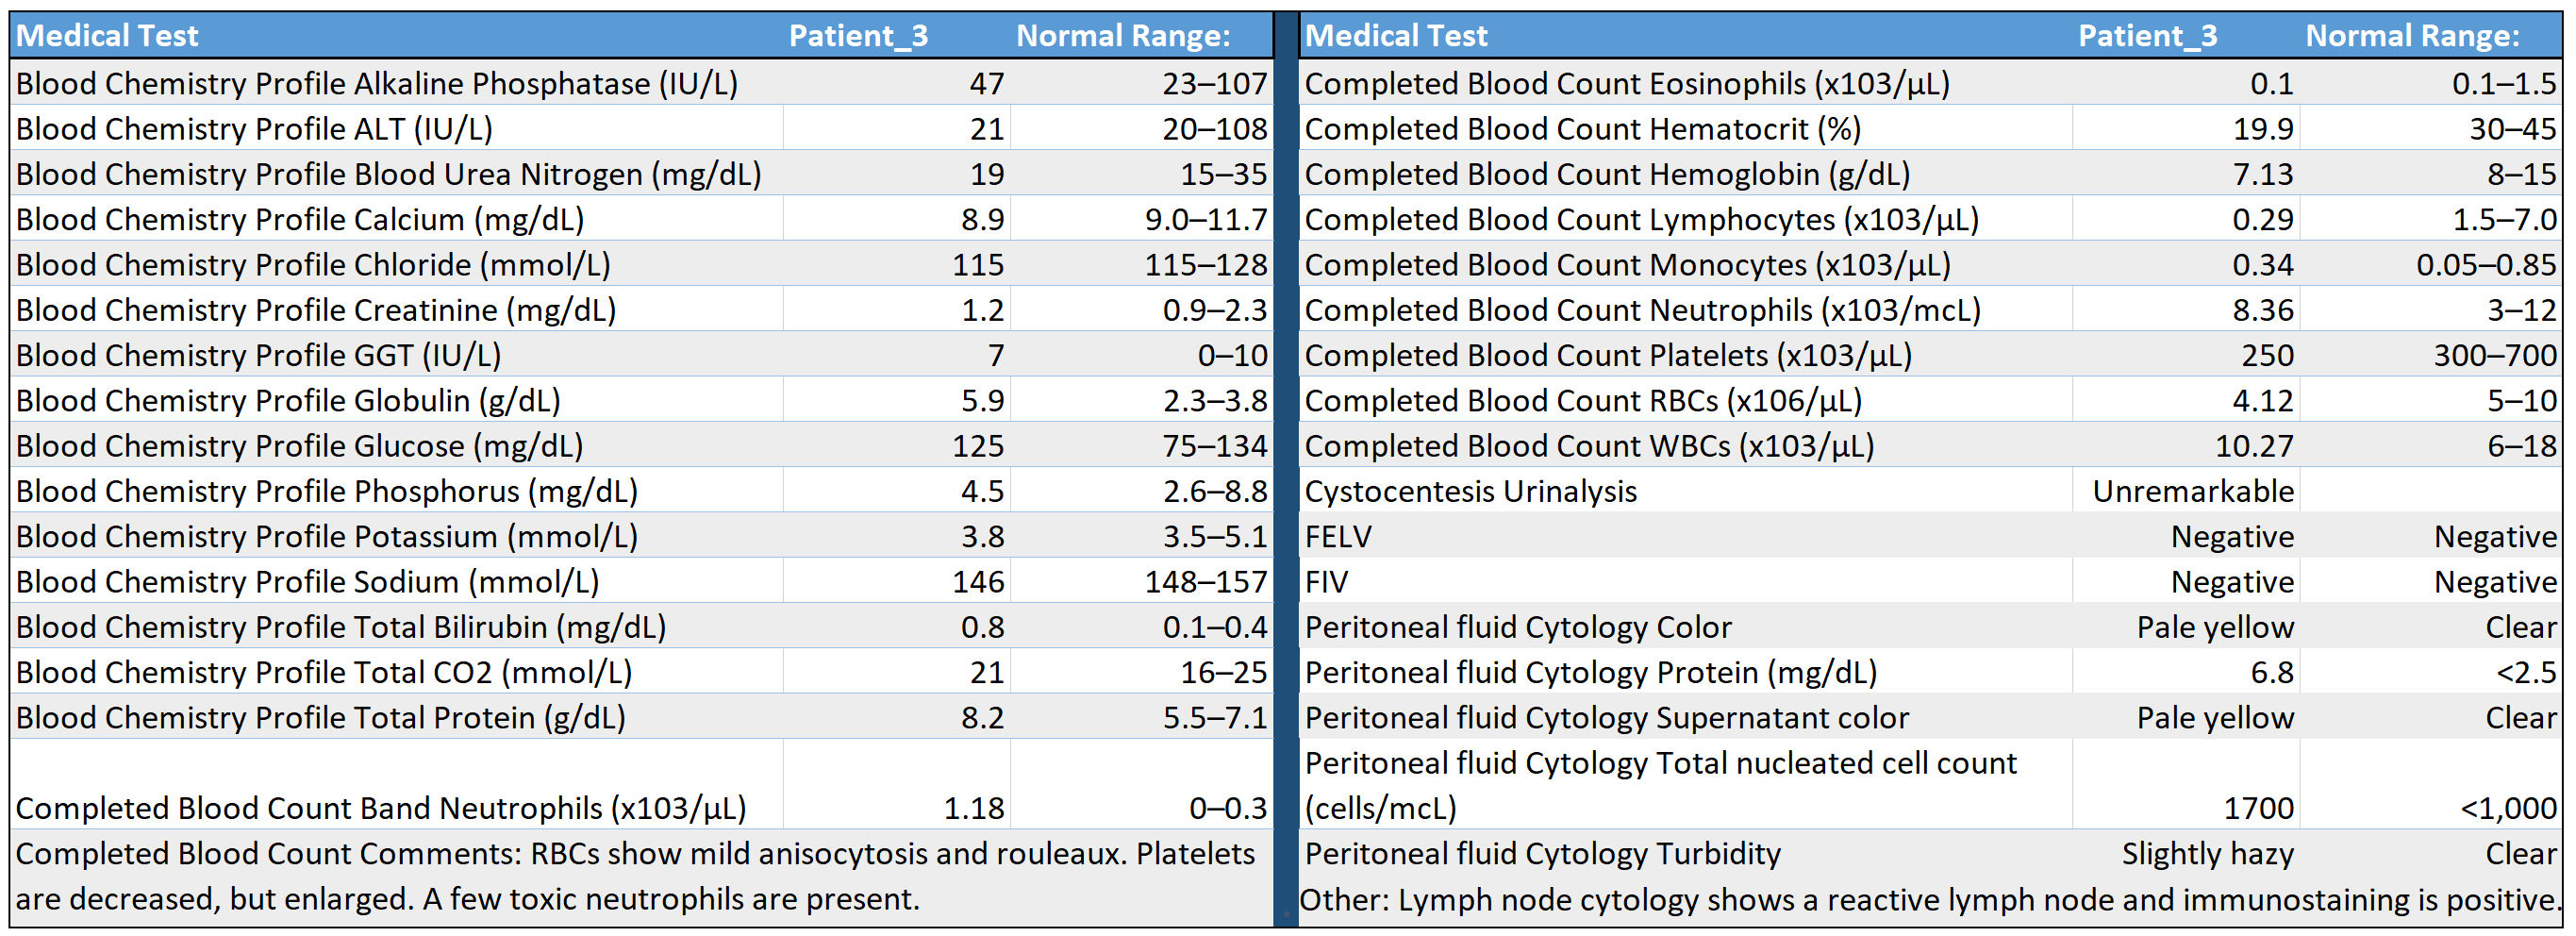

In [13]:
#Sanity Checks to confirm the groups are created correctly
df2_lw[lw_column_groups['BCP']]

,Blood Chemistry Profile (BCP)_0 Lower Range,Blood Chemistry Profile (BCP)_1 Upper Range,Blood Chemistry Profile (BCP)_Test,Blood Chemistry Profile ALP (IU/L)_0 Lower Range,Blood Chemistry Profile ALP (IU/L)_1 Upper Range,Blood Chemistry Profile ALP (IU/L)_Test,Blood Chemistry Profile ALT (IU/L)_0 Lower Range,Blood Chemistry Profile ALT (IU/L)_1 Upper Range,Blood Chemistry Profile ALT (IU/L)_Test,Blood Chemistry Profile AST_0 Lower Range,...,Blood Chemistry Profile Sodium (mmol/L)_Test,Blood Chemistry Profile Total Bilirubin (mg/dL)_0 Lower Range,Blood Chemistry Profile Total Bilirubin (mg/dL)_1 Upper Range,Blood Chemistry Profile Total Bilirubin (mg/dL)_Test,Blood Chemistry Profile Total CO2 (mmol/L)_0 Lower Range,Blood Chemistry Profile Total CO2 (mmol/L)_1 Upper Range,Blood Chemistry Profile Total CO2 (mmol/L)_Test,Blood Chemistry Profile Total Protein (g/dL)_0 Lower Range,Blood Chemistry Profile Total Protein (g/dL)_1 Upper Range,Blood Chemistry Profile Total Protein (g/dL)_Test
2,NaN,,NaN,NaN,NaN,NaN,20,108,21.0,NaN,...,146.0,0.1,0.4,0.8,16,25,21.0,5.5,7.1,8.2


- [Case Study #3 Demo: Intake -> Treatment Plan Sources](#seq2)

---

#### Case Study #3 Demo: Intake -> Treatment Plan Sources: <a class="anchor" id="seq1"></a>

In [14]:
# Helper function to generate the case study string based on the columns in column_groups['Patient_Info'] and column_groups['Intake']
def generate_case_study_string(row):
    # Combine the columns from Patient_Info and Intake
    cs_combined_columns = cs_column_groups['Patient_Info'] + cs_column_groups['Intake']
    
    # Create the string based on the values in these columns
    cs_items = [f"{column}: {row[column]}" for column in cs_combined_columns]
    return ', '.join(cs_items)

In [15]:
#Updated Helper function to skip columns that do not exist.

def generate_lab_work_string(row):
    # Skip columns that do not exist
    lw_combined_columns = (
        lw_column_groups['BCP'] + lw_column_groups['Coagulation panel'] + 
        lw_column_groups['CBC'] + lw_column_groups['Cytology'] + 
        lw_column_groups['Peritoneal fluid cytology'] + lw_column_groups['Fecal'] + 
        lw_column_groups['FELV/FIV'] + lw_column_groups['Histopathology'] + 
        lw_column_groups['MRI'] + lw_column_groups['Parvovirus'] + 
        lw_column_groups['Radiographs'] + lw_column_groups['Sediment evaluation'] + 
        lw_column_groups['Synovial fluid analysis'] + lw_column_groups['Ultrasound'] + 
        lw_column_groups['Urinalysis'] + lw_column_groups['Cystocentesis urinalysis'] + 
        lw_column_groups['Dipstick results urinalysis'] + 
        lw_column_groups['Naturally voided sample urinalysis'] + lw_column_groups['Urine culture']
    )

    # Creates the string based on the values in these columns
    lw_items = [f"{column}: {row[column]}" for column in lw_combined_columns if column in row]
    return ', '.join(lw_items)


In [16]:
# Step 1: Helper function to extract Lab Interpretation data
def generate_lab_interpretation_string(row):
    return row['Lab Interpretation']

In [17]:
def helper_function_2(row):
    case_study_string = generate_case_study_string(row)
    if all(col in case_study_string for col in cs_column_groups['Patient_Info']) and all(col in case_study_string for col in cs_column_groups['Intake']):
        #print("'Patient_Info' and 'Intake' are trying to predict Differential Diagnoses")
        return row['Differential Diagnoses']
    else:
        return None

# Code Option 1 - merge column:
# Apply helper_function_2 and directly create a DataFrame with only 'Medical Tests' column
veterinary_diagnosis_helper = df2_cs.apply(helper_function_2, axis=1)
veterinary_diagnosis_df = pd.DataFrame({'Patient_ID': df2_cs['Patient_ID'], 'Differential Diagnoses': veterinary_diagnosis_helper})

In [18]:
# Define the differential diagnoses chain
diagnoses_template = """Patient information: {case_study}
Based on the provided patient file, list the most likely differential diagnoses:
% CASE_STUDY
{case_study}

YOUR RESPONSE:
"""
diagnoses_prompt_template = PromptTemplate(input_variables=["case_study"], template=diagnoses_template)
differential_diagnoses_chain = LLMChain(llm=llm, prompt=diagnoses_prompt_template, output_key="diagnoses")

# Define the sources chain
sources_template = """Provide veterinary professional medical sources for the differential diagnoses {diagnoses}.
% DIAGNOSES
{diagnoses}

YOUR RESPONSE:
"""
sources_prompt_template = PromptTemplate(input_variables=["diagnoses"], template=sources_template)
sources_chain = LLMChain(llm=llm, prompt=sources_prompt_template, output_key="sources")

# Define the medical tests chain
tests_template = """Given the differential diagnoses and sources {diagnoses}, {sources}, what medical tests should be ordered to confirm the correct diagnosis?
% DIAGNOSES
{diagnoses}
% SOURCES
{sources}

YOUR RESPONSE:
"""
tests_prompt_template = PromptTemplate(input_variables=["diagnoses", "sources"], template=tests_template)
medical_tests_chain = LLMChain(llm=llm, prompt=tests_prompt_template, output_key="medical_tests")

# confidence_template
confidence_template = """Given the case study and differential diagnoses {case_study}, {diagnoses}, provide a confidence score per diagnosis:

% DIAGNOSES
{diagnoses}
% CASE_STUDY
{case_study}

YOUR RESPONSE:
"""
# Update the input_variables to include "case_study", "diagnoses", and "medical_tests"
confidence_prompt_template = PromptTemplate(input_variables=["case_study", "diagnoses"], template=confidence_template)
confidence_chain = LLMChain(llm=llm, prompt=confidence_prompt_template, output_key="confidence_scores")

# Define the lab results chain
test_results_template = """Lab results: {lab_work}
Based on the provided data, summarize the abnormal results:

% LAB_WORK
{lab_work}

YOUR RESPONSE:
"""
test_results_prompt_template = PromptTemplate(input_variables=["lab_work"], template=test_results_template)
test_results_chain = LLMChain(llm=llm, prompt=test_results_prompt_template, output_key="test_results")

primary_template = """Given all the patient information collected {case_study}, {diagnoses}, {test_results}, {lab_interpretation}, list the primary diagnosis:

% CASE_STUDY
{case_study}
% DIAGNOSES
{diagnoses}
% TEST_RESULTS
{test_results}
% LAB_INTERPRETATION
{lab_interpretation}

YOUR RESPONSE:
"""
primary_prompt_template = PromptTemplate(input_variables=["case_study", "diagnoses", "test_results", "lab_interpretation"], template=primary_template)
primary_chain = LLMChain(llm=llm, prompt=primary_prompt_template, output_key="primary_diagnosis")

# Define the primary diagnosis confidence chain
primary_confidence_template = """Given all the patient information collected {case_study}, {test_results}, {lab_interpretation}, {primary_diagnosis}, provide a confidence score for the primary diagnosis:
% CASE_STUDY
{case_study}
% TEST_RESULTS
{test_results}
% LAB_INTERPRETATION
{lab_interpretation}
% PRIMARY_DIAGNOSIS
{primary_diagnosis}

YOUR RESPONSE:
"""
primary_confidence_prompt_template = PromptTemplate(input_variables=["case_study", "test_results", "lab_interpretation", "primary_diagnosis"], template=primary_confidence_template)
primary_confidence_chain = LLMChain(llm=llm, prompt=primary_confidence_prompt_template, output_key="primary_confidence")

# Define the treatment plan chain
treatment_template = """Provide a detailed patient treatment plan for the primary diagnosis {primary_diagnosis} based on the patient information {case_study}, {test_results}, {lab_interpretation}: 

% PRIMARY_DIAGNOSIS
{primary_diagnosis}
% CASE_STUDY
{case_study}
% TEST_RESULTS
{test_results}
% LAB_INTERPRETATION
{lab_interpretation}

YOUR RESPONSE:
"""
treatment_prompt_template = PromptTemplate(input_variables=["primary_diagnosis", "case_study", "test_results", "lab_interpretation"], template=treatment_template)
treatment_chain = LLMChain(llm=llm, prompt=treatment_prompt_template, output_key="treatment_plan")

# Define the treatment sources chain
treatment_sources_template = """Provide veterinary professional medical sources for the treatment plan {treatment_plan}.
% TREATMENT_PLAN
{treatment_plan}

YOUR RESPONSE:
"""
treatment_sources_prompt_template = PromptTemplate(input_variables=["treatment_plan"], template=treatment_sources_template)
treatment_sources_chain = LLMChain(llm=llm, prompt=treatment_sources_prompt_template, output_key="treatment_sources")

# Overall chain - run these three chains in sequence.
from langchain.chains import SequentialChain
overall_chain = SequentialChain(
    chains=[differential_diagnoses_chain, sources_chain, medical_tests_chain, confidence_chain, test_results_chain, primary_chain, primary_confidence_chain, treatment_chain, treatment_sources_chain],  # Updated order
    input_variables=["case_study", "lab_work", "lab_interpretation"],
    # Here we return multiple variables
    output_variables=["diagnoses", "sources", "medical_tests", "confidence_scores", "test_results", "primary_diagnosis", "primary_confidence", "treatment_plan", "treatment_sources"],  # Updated order
    verbose=False)

#### Case Study #3 Demo: Intake -> Treatment Plan Sources: <a class="anchor" id="seq2"></a>

In [26]:
%%time

# Define colors using ANSI escape codes
class Colors:
    HEADER = '\033[95m'  # Purple
    OKBLUE = '\033[94m'  # Blue
    OKGREEN = '\033[92m'  # Green
    DARKGREEN = '\033[32m'  # Dark Green
    CYAN = '\033[96m'  # Cyan
    LIGHTGRAY = '\033[37m'  # Light Gray
    DARKGRAY = '\033[90m'  # Dark Gray
    WHITE = '\033[97m'  # White
    BLACK = '\033[30m'  # Black
    BRIGHTRED = '\033[31m'  # Bright Red
    BRIGHTBLUE = '\033[34m'  # Bright Blue
    WARNING = '\033[93m'  # Orange
    FAIL = '\033[91m' # Red
    ENDC = '\033[0m' 
    BOLD = '\033[1m' #Bold
    UNDERLINE = '\033[4m'

# Step 1: Initialize an empty list
results_list = []

for (index1, row1), (index2, row2) in zip(df2_cs.iterrows(), df2_lw.iterrows()):
    
    # Extract information from the dataframes using helper functions
    case_study = generate_case_study_string(row1)
    lab_work = generate_lab_work_string(row2)
    
    # Extract Lab Interpretation data using the new helper function
    lab_interpretation = generate_lab_interpretation_string(row1)
    
    # Run the overall_chain with all three inputs
    chain_results = overall_chain({
        "case_study": case_study, 
        "lab_work": lab_work, 
        "lab_interpretation": lab_interpretation
    })
    
    # Access the results using the keys you've defined in the chain
    differential_predictions = chain_results["diagnoses"]
    sources = chain_results["sources"]
    medical_tests = chain_results["medical_tests"]
    confidence_scores = chain_results["confidence_scores"] 
    test_results = chain_results["test_results"]
    primary_diagnosis = chain_results["primary_diagnosis"]
    primary_confidence = chain_results["primary_confidence"]
    treatment_plan = chain_results["treatment_plan"]
    treatment_sources = chain_results["treatment_sources"]
    
    # Print the results for each iteration with color
    #print(Colors.BOLD + Colors.BRIGHTBLUE + f"Row {index1 + 1}:" + Colors.ENDC)
    print(Colors.BOLD + Colors.DARKGRAY + "Patient #3 Case Study: 2yr old male cat Charlie Cat with weight loss and a distended abdomen" + Colors.ENDC)
    print()
    print(Colors.BOLD + Colors.DARKGRAY + "Part 1: Patient Intake -> Differential Diagnoses & Medical Test Recommendations" + Colors.ENDC)
    print()
    # Differential Predictions in Green
    print(Colors.OKBLUE + "Differential Predictions: " + differential_predictions + Colors.ENDC)
    print()
    # Sources in Blue
    print(Colors.OKGREEN + "Sources: " + sources + Colors.ENDC)
    print()
    # Medical Tests in Purple
    print(Colors.HEADER + "Medical Tests: " + medical_tests + Colors.ENDC)
    print()
    # Confidence Scores in Orange
    print(Colors.WARNING + "Confidence Scores: " + confidence_scores + Colors.ENDC)
    print(Colors.DARKGRAY + "--------------------------------------------------" + Colors.ENDC)
    print()
    print(Colors.BOLD + Colors.DARKGRAY + "Part 2: Test Results Interpretation & Treatment Plan" + Colors.ENDC)
    print()
    print(Colors.OKBLUE + "Test Results: " + test_results + Colors.ENDC)
    print()
    print(Colors.OKGREEN + "Primary Diagnosis: " + primary_diagnosis + Colors.ENDC)
    print()
    print(Colors.HEADER+ "Primary Confidence: " + primary_confidence + Colors.ENDC)
    print()
    print(Colors.WARNING + "Treatment Plan: " + treatment_plan + Colors.ENDC)
    print()
    print(Colors.CYAN + "Treatment Sources: " + treatment_sources + Colors.ENDC)
    print(Colors.DARKGRAY + "--------------------------------------------------" + Colors.ENDC)
    
    # Store results
    results_list.append({
        'Patient_ID': row1['Patient_ID'], 
        "differential_predictions": chain_results["diagnoses"],
        "sources": chain_results["sources"],
        "medical_tests": chain_results["medical_tests"],
        "confidence_scores": chain_results["confidence_scores"],
        "test_results": chain_results["test_results"],
        "primary_diagnosis": chain_results["primary_diagnosis"],
        "primary_confidence": chain_results["primary_confidence"], 
        "treatment_plan": chain_results["treatment_plan"],
        "treatment_sources": chain_results["treatment_sources"]
    })

# Convert the results to a new DataFrame, if needed
results_df = pd.DataFrame(results_list)

Patient #3 Case Study: 2yr old male cat Charlie Cat with weight loss and a distended abdomen

Part 1: Patient Intake -> Differential Diagnoses & Medical Test Recommendations

Differential Predictions: 1. Feline Infectious Peritonitis: Given this young cat's clinical signs such as lethargy, anorexia, weight loss, distended abdomen with fluid wave, slightly yellow skin and mucous membranes and increased serum globulins in the bloodwork, Feline Infectious Peritonitis should be considered as an important differential. This disease often leads to pyogranulomatous inflammation in various parts of the body that are responsible for the clinical signs seen.

2. Hepatic lipidosis (Fatty liver disease): This condition can occur in cats that have had decreased appetite or complete anorexia over a period of time. The noticeably yellow color of skin might indicate possible jaundice which can be a clinical sign of this disease.

3. Gastrointestinal or abdominal cancer: Given the prolonged capillary r

In [20]:
# Merging 'Medical Tests' column from medical_tests_df to df_medical_tests
results_df2 = results_df.merge(veterinary_diagnosis_df, on='Patient_ID', how='left')

In [21]:
import re
import nltk
from nltk.corpus import stopwords

# Download the stopwords from nltk
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
stop_words.update(['infection', 'disease', 'illnesses', 'include'])  # Add additional common words if needed

def tokenize(text):
    """
    Tokenize the input text by non-alphabetic characters and filter out stop words.
    :param text: input string
    :return: set of unique tokens
    """
    tokens = re.split('[^a-z]+', text.lower())  # Tokenize by non-alphabetic characters
    return set(token for token in tokens if token and token not in stop_words)  # Return unique tokens excluding stop words

def evaluate_predictions_rowwise(df):
    """
    Compare the predicted veterinary diagnoses to the original differential diagnoses for each row.
    :param df: The dataframe with the original and predicted differential diagnoses.
    :return: List of dictionaries with evaluation results for each row.
    """
    evaluation_results = []

    for index, row in df.iterrows():
        patient_id = row['Patient_ID']
        differential_diagnoses = row['Differential Diagnoses'] if isinstance(row['Differential Diagnoses'], str) else ""
        
        # Tokenize the Differential Diagnoses
        diagnoses_list = differential_diagnoses.lower().split("\n")
        diagnoses_tokens = {diagnosis: tokenize(diagnosis) for diagnosis in diagnoses_list}
        
        # Extract and Tokenize the Differential Predictions
        differential_predictions = row['differential_predictions'] if isinstance(row['differential_predictions'], str) else ""
        predictions_list = re.split(r'[.,;]\s*', differential_predictions.lower())  # Split by punctuation and whitespace
        predictions_tokens = {prediction: tokenize(prediction) for prediction in predictions_list}

        matching_diagnoses = []
        for diagnosis, diagnosis_tokens in diagnoses_tokens.items():
            for prediction, prediction_tokens in predictions_tokens.items():
                if diagnosis_tokens.intersection(prediction_tokens):
                    matching_diagnoses.append(diagnosis)
                    break
                
        # If matching_diagnoses is not empty, then it is correct
        is_correct = 1 if matching_diagnoses else 0

        evaluation_results.append({
            'Patient_ID': patient_id,
            'Differential_Diagnoses': diagnoses_list,
            'Differential_Predictions': predictions_list,
            'Correct': is_correct,
            'Matching_Diagnosis': matching_diagnoses if is_correct else None
        })

    return evaluation_results

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Fally\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [22]:
# Evaluate the accuracy of the predictions for each row
rowwise_results = evaluate_predictions_rowwise(results_df2)

results_df = pd.DataFrame(rowwise_results)
#results_df

results_df = results_df.style.set_properties(**{'text-align': 'left'})
results_df = results_df.set_table_styles([dict(selector = 'th', props=[('text-align', 'left')])])
with option_context('display.max_colwidth', 500):
    display(results_df)

,Patient_ID,Differential_Diagnoses,Differential_Predictions,Correct,Matching_Diagnosis
0,Patient_3,"['abdominal muscle hypotonia', 'fluid', 'gas', 'gastrointestinal contents', 'soft tissue', 'feline infectious peritonitis (fip)', 'lymphoma']","['1', 'feline infectious peritonitis (fip): the history of recurring lethargy', 'anorexia', 'decreased appetite', 'visible weight loss', 'and increased serum globulins align with fip', 'the additional physical findings such as distended abdomen with fluid wave', 'prolonged crt', 'and pale', 'slightly yellow mucus membranes support this diagnosis', '2', 'hepatic lipidosis (fatty liver disease): this could be possible due to the lethargy', 'anorexia', 'yellow skin (jaundice)', 'and apparent illness', 'liver disease would also explain the increased globulins in the bloodwork', '3', 'cholangitis/cholangiohepatitis syndrome: this could explain the lethargy', 'anorexia', 'jaundice', 'and thin body conditions', 'this illness is often associated with an increase in globulins as well', '4', 'pancreatitis: acute or chronic pancreatitis can result in lethargy', 'anorexia', 'decreased appetite and also result in elevated globulins levels observed in the lab work', '5', 'neoplasia/cancer: a less likely differential', 'but could account for the recurring lethargic state', 'the loss of appetite', 'and the possible weight loss', 'certain cancers can cause increased globulins', 'all of these differentials could present with similar clinical signs and laboratory findings', 'and further diagnostic testing would be beneficial to narrow down the diagnosis', '']",1,"['fluid', 'feline infectious peritonitis (fip)']"


In [23]:
def evaluate_predictions(df):
    """
    Evaluate predictions both row-wise and overall.

    :param df: The dataframe with both original and predicted differential diagnoses.
    :return: A tuple containing the overall accuracy and a list of dictionaries with evaluation results for each row.
    """
    rowwise_results = evaluate_predictions_rowwise(df)

    correct_predictions = sum([1 for result in rowwise_results if result['Correct'] == 1])
    total_predictions = len(rowwise_results)
    
    overall_accuracy = correct_predictions / total_predictions if total_predictions > 0 else 0

    return overall_accuracy, rowwise_results

# Use the merged dataframe results_df2 to evaluate predictions
overall_accuracy, rowwise_accuracy = evaluate_predictions(results_df2)

print(f"Overall Accuracy: {overall_accuracy * 100:.2f}%")
print("Row-wise Accuracy:")
for result in rowwise_accuracy:
    print(f"Patient_ID: {result['Patient_ID']}, Correct: {result['Correct']}, Matching Diagnosis: {result['Matching_Diagnosis']}")

Overall Accuracy: 100.00%
Row-wise Accuracy:
Patient_ID: Patient_3, Correct: 1, Matching Diagnosis: ['fluid', 'feline infectious peritonitis (fip)']


---